Simple linear regression is used to model the linear relationship between a single independent variable and a dependent variable.

We start off by importing the required libraries, including the `LinearRegression` package.

In [2]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

We import a dataset that aggregates a World Happiness Report, which is a survey of the state of global happiness. It contains surveyed information regarding 156 countries around the world and their overall happiness. Additionally, it contains information like` GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, and `Perceptions of corruption`. Information from here can be used to inform policy-making decisions.

In our case, we want to see how much do these listed factors influence overall happiness.

In [6]:
data = pd.read_csv("../../datasets/happiness_report.csv")

So which one of these factors might be interesting to look like? I thought it might be interesting to look at how `GDP per capita`, `Social support`, `Healthy life expectancy`, and `Freedom to make life choices` potentially influence the `Score`. 

As a result, we're going to create DataFrames for each of these columns of data that we want to designate as independent variables:

1. `gdp`
2. `social_support`
3. `life_expectancy`
4. `freedom`

We also need to create a DataFrame for the `Score` column so that we can designate it as a dependent variable.

In [63]:
# x values
gdp = data['GDP per capita'].values.reshape(-1, 1)
social_support = data['Social support'].values.reshape(-1, 1)
life_expectancy = data['Healthy life expectancy'].values.reshape(-1, 1)
freedom = data['Freedom to make life choices'].values.reshape(-1, 1)
# y values
score = data['Score'].values

In [56]:
# Create linear regression model
gdpModel = LinearRegression()

# Train the model
gdpModel.fit(gdp, score)

# Make predictions
gdp_predict_score = gdpModel.predict(gdp)


In [57]:
socialSupportModel = LinearRegression()

# Train the model
socialSupportModel.fit(social_support, score)

# Make predictions
social_support_predict_score = socialSupportModel.predict(social_support)

In [58]:
lifeExpectancyModel = LinearRegression()

# Train the model
lifeExpectancyModel.fit(life_expectancy, score)

# Make predictions
life_expectancy_predict_score = lifeExpectancyModel.predict(life_expectancy)

In [62]:
freedomModel = LinearRegression()

# Train the model
freedomModel.fit(freedom, score)

# Make predictions
freedom_predict_score = freedomModel.predict(freedom)

Text(0.5, 1.0, 'Affect of Freedom on Happiness')

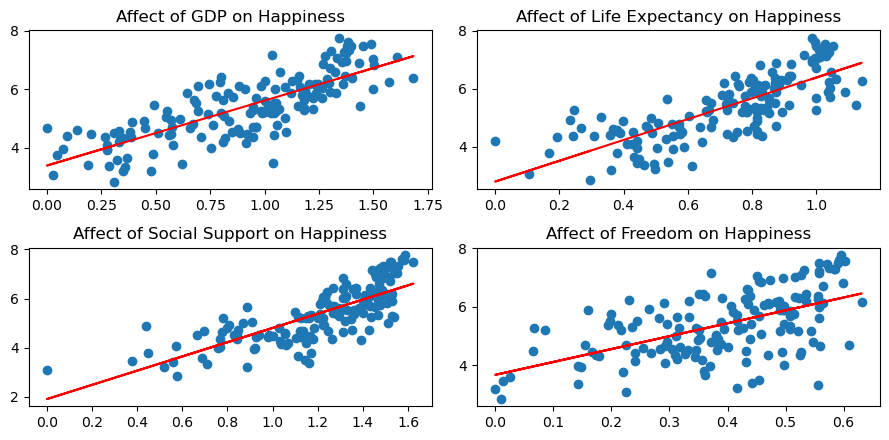

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(9, 4.5), tight_layout=True)

axs[0, 0].scatter(gdp, score)
axs[0, 0].plot(gdp, gdp_predict_score, c="red")
axs[0, 0].set_title("Affect of GDP on Happiness")

axs[1, 0].scatter(social_support, score)
axs[1, 0].plot(social_support, social_support_predict_score, c="red")
axs[1, 0].set_title("Affect of Social Support on Happiness")

axs[0, 1].scatter(life_expectancy, score)
axs[0, 1].plot(life_expectancy, life_expectancy_predict_score, c="red")
axs[0, 1].set_title("Affect of Life Expectancy on Happiness")

axs[1, 1].scatter(freedom, score)
axs[1, 1].plot(freedom, freedom_predict_score, c="red")
axs[1, 1].set_title("Affect of Freedom on Happiness")